## Importing Modules

In [70]:
# Import Pandas 
import pandas as pd
# Import numpy 
import numpy as np
# Import Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from pandas.core import  datetools
from statsmodels.graphics import tsaplots
from pylab import rcParams

In [44]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

### Loading Time series data

The most common way to import time series data in Python is by using the pandas library. You can use the read_csv() from pandas to read the contents of a file into a DataFrame. 

Once your data is loaded into Python, you can display the first rows of your DataFrame by calling the .head(n=5) method, where n=5 indicates that you want to print the first five rows of your DataFrame.

In [5]:
df = pd.read_csv("co2_levels.csv")
print(df.head(10))

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4
5  1958-05-03  316.9
6  1958-05-10    NaN
7  1958-05-17  317.5
8  1958-05-24  317.9
9  1958-05-31    NaN


## Find missing values

In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp. To count the number of missing values in a DataFrame called df that contains time series data, you can use the command:

"" missing_values = df.isnull().sum() ""



In [37]:
# Set datestamp column as index
co2_levels = df.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64
              co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


### Handle missing values
In order to replace missing values in your time series data, you can use the command:

df = df.fillna(method="ffill")

where the argument specifies the type of method you want to use. For example, specifying bfill (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while ffill (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

In [8]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


### Display rolling averages

It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame df, you can obtain the rolling average of the time series by using the command:

*************df_mean = df.rolling(window=12).mean()***********************

The window parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to window=365. In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (.std()) or variance (.var()).

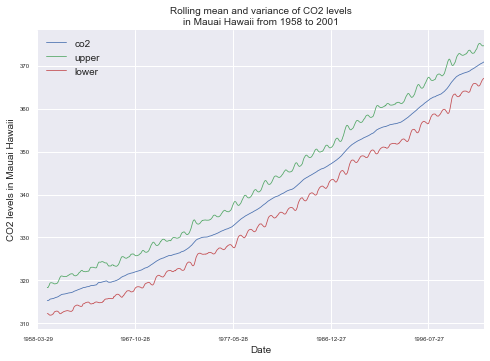

In [9]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

### Display aggregated values

You may sometimes be required to display your data in a more aggregated form. For example, the co2_levels data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the co2_levels DataFrame where the index is a datetime type, you can extract the year of each dates in the index:

index_year = df.index.year

To extract the month or day of the dates in the indices of the df DataFrame, you would use df.index.month and df.index.day, respectively. You can then use the extracted year of each indices in the co2_levels DataFrame and the groupby function to compute the mean CO2 levels by year:

df_by_year = df.groupby(index_year).mean()

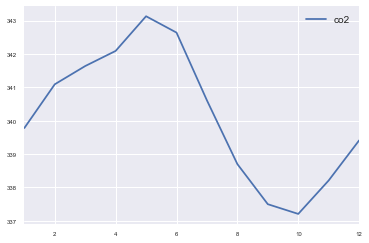

In [47]:
# Get month for each dates in the index of co2_levels
index_month = co2.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

### Compute numerical summaries

This will print statistics including the mean, the standard deviation, the minima and maxima and the number of observations for all numeric columns in your pandas DataFrame.

In [50]:
# Print out summary statistics of the co2_levels DataFrame
print(co2.describe())

# Print outthe minima of the co2 column in the co2_levels DataFrame
print(np.min(co2))

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(np.max(co2))

               co2
count  2225.000000
mean    340.142247
std      17.003885
min     313.000000
25%     324.800000
50%     338.300000
75%     354.800000
max     373.900000
co2    313.0
dtype: float64
co2    373.9
dtype: float64


### Boxplots and Histograms

Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the .boxplot() method on a DataFrame.

Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


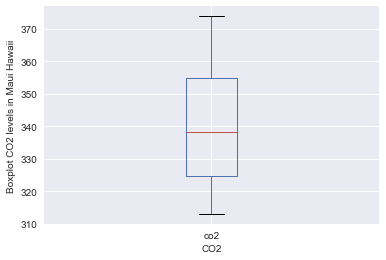

In [53]:
# Generate a boxplot
ax = co2.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

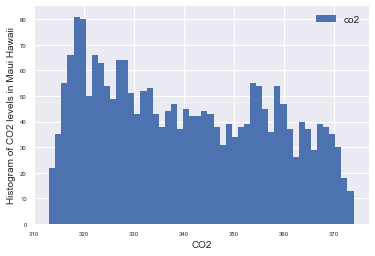

In [54]:
# Generate a histogram
ax = co2.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

### Density plots
histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below:

The standard .plot() method is specified with the kind argument set to 'density'. We also specified an additional parameter linewidth, which controls the width of the line to be plotted.

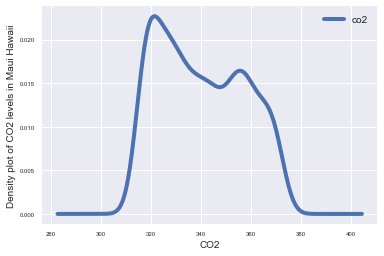

In [55]:
# Display density plot of CO2 levels values
ax = co2.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

### Autocorrelation in time series data

In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

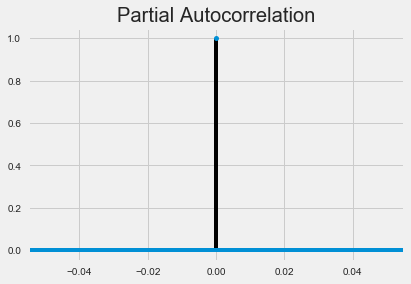

In [69]:
# matplotlib styel use
plt.style.use('fivethirtyeight')


# Display the autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

### Time series decomposition

When visualizing time series data, you should look out for some distinguishable patterns:

seasonality: does the data display a clear periodic pattern?
trend: does the data follow a consistent upwards or downward slope?
noise: are there any outlier points or missing values that are not consistent with the rest of the data?

rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The statsmodels library provides the seasonal_decompose() function to perform time series decomposition out of the box.

decomposition = sm.tsa.seasonal_decompose(time_series)

can extract a specific component, for example seasonality, by accessing the seasonal attribute of the decomposition object.

In [ ]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

### Plot individual components

It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, resid) components.

In [ ]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [82]:
airline = pd.read_csv("airline_passengers.csv")

In [85]:
airline.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [86]:
airline['Month'] = pd.to_datetime(airline['Month'])

### Visualize the airline dataset
new dataset that contains the monthly number of passengers who took a commercial flight between January 1949 and December 1960.

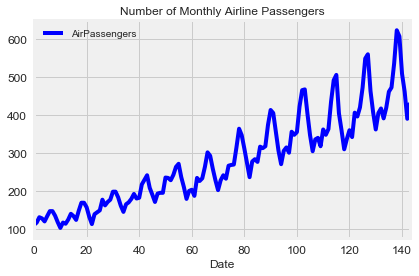

In [93]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
#ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

### Analyze the airline dataset

In [94]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

Month            0
AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


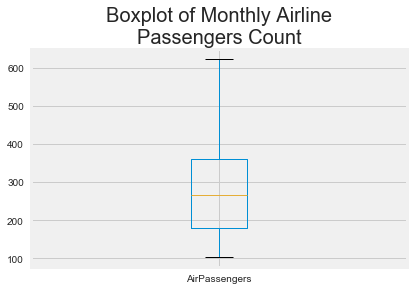

In [95]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()